# Hourly Electricity Consumption and Production

##### DateTime : The day and hour of the data.
##### Consumption : The electricity consumption for that hour.
##### Production : The (total) electricity production for that hour.
##### Nuclear : The electricity produced by nuclear means for that hour, in MWs.
##### Wind : The electricity produced by wind means for that hour, in MWs.
##### Hydroelectric : The electricity produced by hydroelectric means for that hour, in MWs.
##### Oil and Gas ; The electricity produced with oil and gas for that hour, in MWs.
##### Coal : The electricity produced with coal for that hour, in MWs.
##### Solar : The electricity produced by solar means for that hour, in MWs.
###### Biomass : The electricity produced with biomass for that hour, in MWs.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams["figure.figsize"] = [20, 6]  # width, height
plt.rcParams['xtick.direction'] = 'out'

In [3]:
df = pd.read_csv("electricityConsumptionAndProductioction.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36772 entries, 0 to 36771
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       36772 non-null  object
 1   Consumption    36772 non-null  int64 
 2   Production     36772 non-null  int64 
 3   Nuclear        36772 non-null  int64 
 4   Wind           36772 non-null  int64 
 5   Hydroelectric  36772 non-null  int64 
 6   Oil and Gas    36772 non-null  int64 
 7   Coal           36772 non-null  int64 
 8   Solar          36772 non-null  int64 
 9   Biomass        36772 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 2.8+ MB


In [5]:
df.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [6]:
df.tail()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
36767,2023-03-12 19:00:00,6500,6643,1407,111,3084,933,1047,0,60
36768,2023-03-12 20:00:00,6471,6484,1408,58,2983,933,1042,0,60
36769,2023-03-12 21:00:00,6194,6413,1406,39,2938,935,1031,0,62
36770,2023-03-12 22:00:00,5708,6217,1406,8,2823,917,1001,0,61
36771,2023-03-12 23:00:00,5409,5900,1403,0,2492,914,1030,0,60


In [7]:
df.describe()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
count,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000,36772.000000
mean,6707.924889,6543.770478,1293.468590,785.700723,1801.603149,1181.630017,1270.038236,151.524094,58.730828
std,1034.961146,1005.486125,237.348752,681.508967,678.981785,422.487653,306.550193,222.768784,13.363835
min,4081.000000,3315.000000,612.000000,-26.000000,175.000000,213.000000,279.000000,0.000000,18.000000
25%,5895.750000,5833.000000,1349.000000,226.000000,1310.000000,881.000000,1080.000000,0.000000,49.000000
50%,6686.000000,6492.000000,1386.000000,577.000000,1708.000000,1216.000000,1254.000000,2.000000,61.000000
75%,7434.000000,7210.000000,1409.000000,1195.250000,2184.000000,1502.000000,1467.000000,268.000000,68.000000
max,9615.000000,9886.000000,1457.000000,2811.000000,4359.000000,2141.000000,2537.000000,869.000000,89.000000


In [8]:
df.columns

Index(['DateTime', 'Consumption', 'Production', 'Nuclear', 'Wind',
       'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass'],
      dtype='object')

In [9]:
df.keys()

Index(['DateTime', 'Consumption', 'Production', 'Nuclear', 'Wind',
       'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass'],
      dtype='object')

In [10]:
df["Consumption"].value_counts().head()

6087    36
7145    30
7177    28
6208    27
6600    27
Name: Consumption, dtype: int64

In [11]:
df['Date'] = df['DateTime'].apply(lambda date: date.split(' ')[0])
df['Time'] = df['DateTime'].apply(lambda time: time.split(' ')[1])

In [12]:
df.dtypes

DateTime         object
Consumption       int64
Production        int64
Nuclear           int64
Wind              int64
Hydroelectric     int64
Oil and Gas       int64
Coal              int64
Solar             int64
Biomass           int64
Date             object
Time             object
dtype: object

In [13]:
df["DateTime"]= pd.to_datetime(df["DateTime"])
df["Date"]= pd.to_datetime(df["Date"])
df.dtypes

DateTime         datetime64[ns]
Consumption               int64
Production                int64
Nuclear                   int64
Wind                      int64
Hydroelectric             int64
Oil and Gas               int64
Coal                      int64
Solar                     int64
Biomass                   int64
Date             datetime64[ns]
Time                     object
dtype: object

In [14]:
df = df.set_index("DateTime")

# Holt-Winters Methods¶


## Simple Exponential Smoothing for Coal

In [15]:
df_coal= df.copy()

In [16]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


In [17]:
span = 168 #weekly
alpha = 2/(span+1)


df_coal['Coal EWMA'] = df_coal["Coal"].ewm(alpha=alpha,adjust=False).mean()
df_coal['Coal SES']=SimpleExpSmoothing(df_coal["Coal"]).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df_coal.head()

C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Date,Time,Coal EWMA,Coal SES
DateTime,,,,,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30,2019-01-01,00:00:00,1744.000000,1744.000000
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30,2019-01-01,01:00:00,1742.781065,1742.781065
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30,2019-01-01,02:00:00,1741.280697,1741.280697
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30,2019-01-01,03:00:00,1739.111695,1739.111695
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30,2019-01-01,04:00:00,1735.784929,1735.784929


## Double Exponential Smoothing for Coal


In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [19]:
df_coal.shape

(36772, 13)

In [20]:
df_coal['Coal DES'] = ExponentialSmoothing(df_coal['Coal'], trend='add').fit().fittedvalues.shift(-1)
df_coal.head()

C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Date,Time,Coal EWMA,Coal SES,Coal DES
DateTime,,,,,,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30,2019-01-01,00:00:00,1744.000000,1744.000000,1770.448294
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30,2019-01-01,01:00:00,1742.781065,1742.781065,1664.989882
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30,2019-01-01,02:00:00,1741.280697,1741.280697,1638.500464
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30,2019-01-01,03:00:00,1739.111695,1739.111695,1578.835816
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30,2019-01-01,04:00:00,1735.784929,1735.784929,1476.303788


In [21]:
x_min = pd.Timestamp('2023-01-01')
x_max = pd.Timestamp('2023-03-12')

(19358.0, 19428.0)

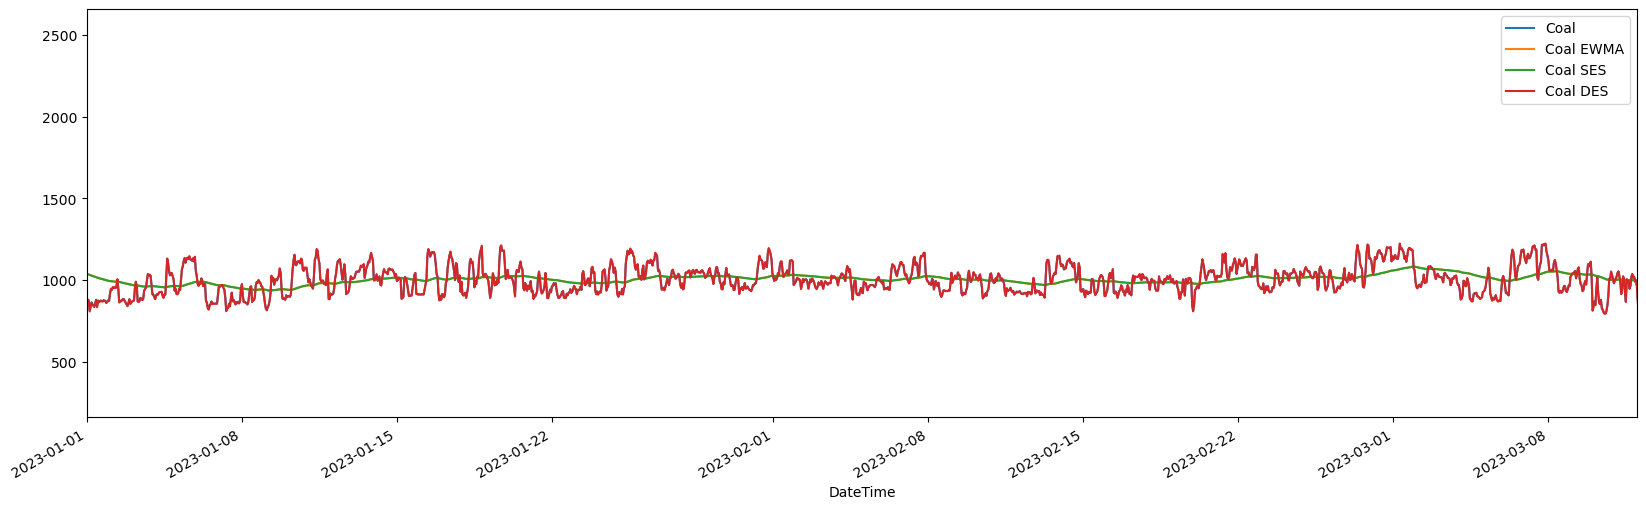

In [22]:
df_coal[['Coal','Coal EWMA','Coal SES' ,'Coal DES']].plot().set_xlim(x_min, x_max)

## Triple Exponential Smoothing for Coal

In [23]:
df_coal['Coal TES'] = ExponentialSmoothing(df_coal['Coal'], trend='add', seasonal='add',seasonal_periods=168).fit().fittedvalues.shift(-1)


C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [24]:
x_min = pd.Timestamp('2023-01-01')
x_max = pd.Timestamp('2023-03-12')

(19358.0, 19428.0)

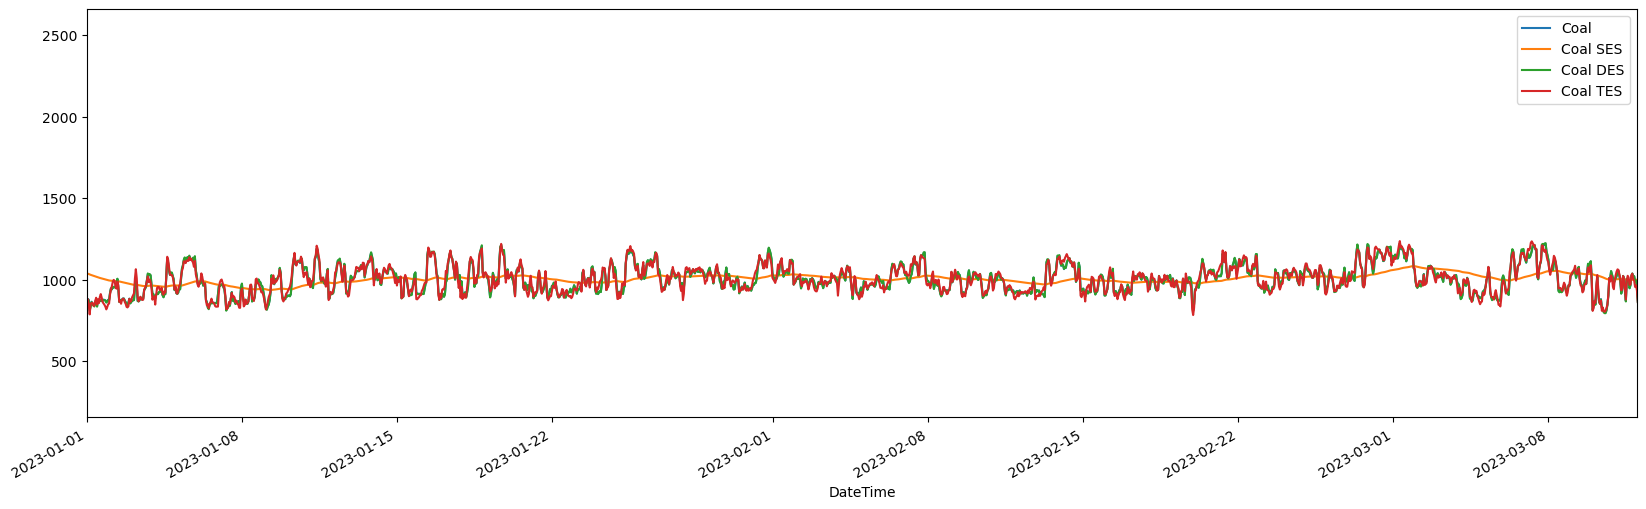

In [25]:
df_coal[['Coal','Coal SES' , 'Coal DES','Coal TES']].plot().set_xlim(x_min, x_max)

### Evaluation Metrics


In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [27]:
train = df_coal.iloc[:26308]
test = df_coal.iloc[26308:]

In [28]:
tes_model = ExponentialSmoothing(train['Coal'], trend='mul',seasonal='mul',seasonal_periods=365).fit()

C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [29]:
tes_pred = tes_model.forecast(len(test))

C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [30]:
mae = mean_absolute_error(test["Coal"],tes_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 6445518.9811876705


In [31]:
mse = mean_squared_error(test["Coal"],tes_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 231797195624077.4


In [32]:
rmse = np.sqrt(mean_squared_error(test["Coal"],tes_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 15224887.376400437


## Autocorrelation Function  for Oil and Gas

In [40]:
from statsmodels.tsa.stattools import acovf,acf
#pacf,pacf_yw,pacf_ols
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from statsmodels.tsa.statespace.tools import diff

In [34]:
df_oil= df.copy()


In [35]:
arr = acovf(df_oil["Oil and Gas"])
arr


array([ 1.78490963e+05,  1.75740418e+05,  1.72409856e+05, ...,
       -8.63387679e+00, -6.94135140e+00, -5.19925081e+00])

In [36]:
arr2 = acovf(df_oil["Oil and Gas"], unbiased=True)
arr2

array([ 178490.96256355,  175745.19774381,  172419.23366224, ...,
       -105828.30580517, -127623.68683754, -191186.85087517])

In [37]:
arr3 = acf(df_oil["Oil and Gas"])
arr3

array([1.        , 0.98459001, 0.96593045, 0.94838596, 0.93153994,
       0.91603263, 0.90185368, 0.889665  , 0.88026947, 0.87283764,
       0.86625457, 0.86017465, 0.85393101, 0.84749462, 0.84105602,
       0.8348776 , 0.82957898, 0.82589262, 0.82444562, 0.82463639,
       0.8259386 , 0.82760844, 0.82906697, 0.829338  , 0.82712244,
       0.81975465, 0.81072764, 0.80057894, 0.7902535 , 0.78015272,
       0.77137249, 0.76443343, 0.75962941, 0.75645285, 0.75407746,
       0.75184686, 0.74921722, 0.74616319, 0.74301224, 0.73982474,
       0.73718917, 0.73587503, 0.73601164, 0.73768836, 0.74069102,
       0.74375213])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

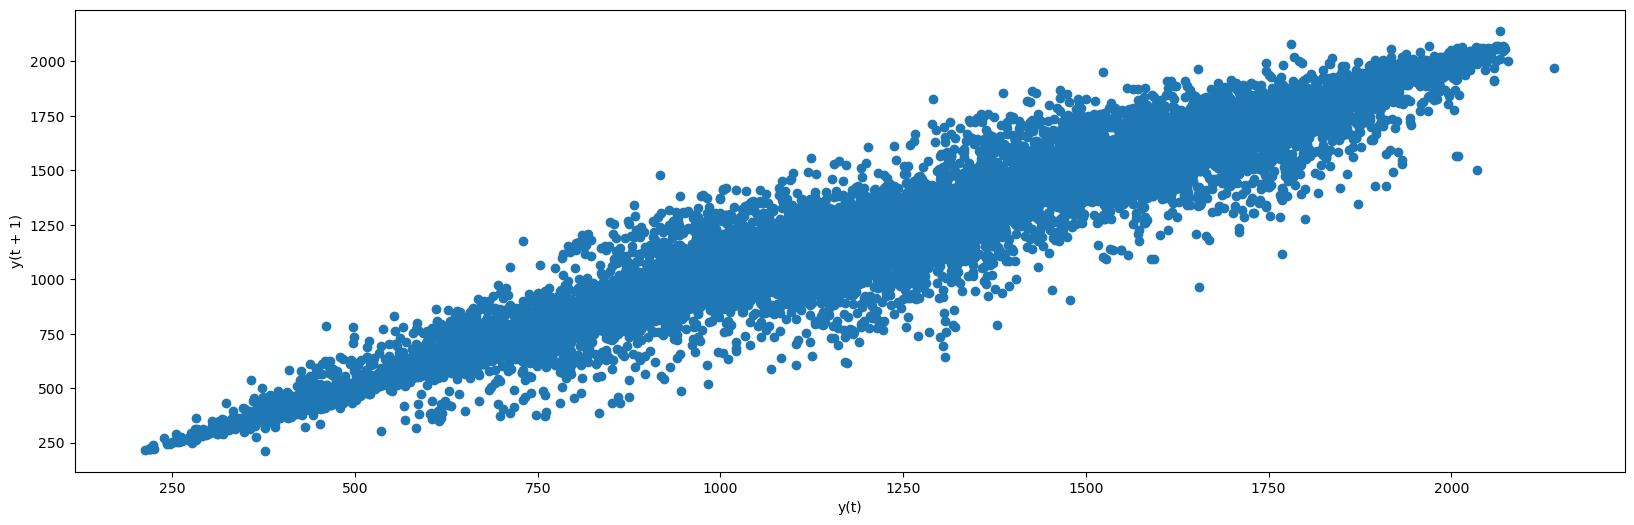

In [39]:
lag_plot(df_oil["Oil and Gas"])

In [41]:
x_min = pd.Timestamp('2023-01-01')
x_max = pd.Timestamp('2023-03-12')

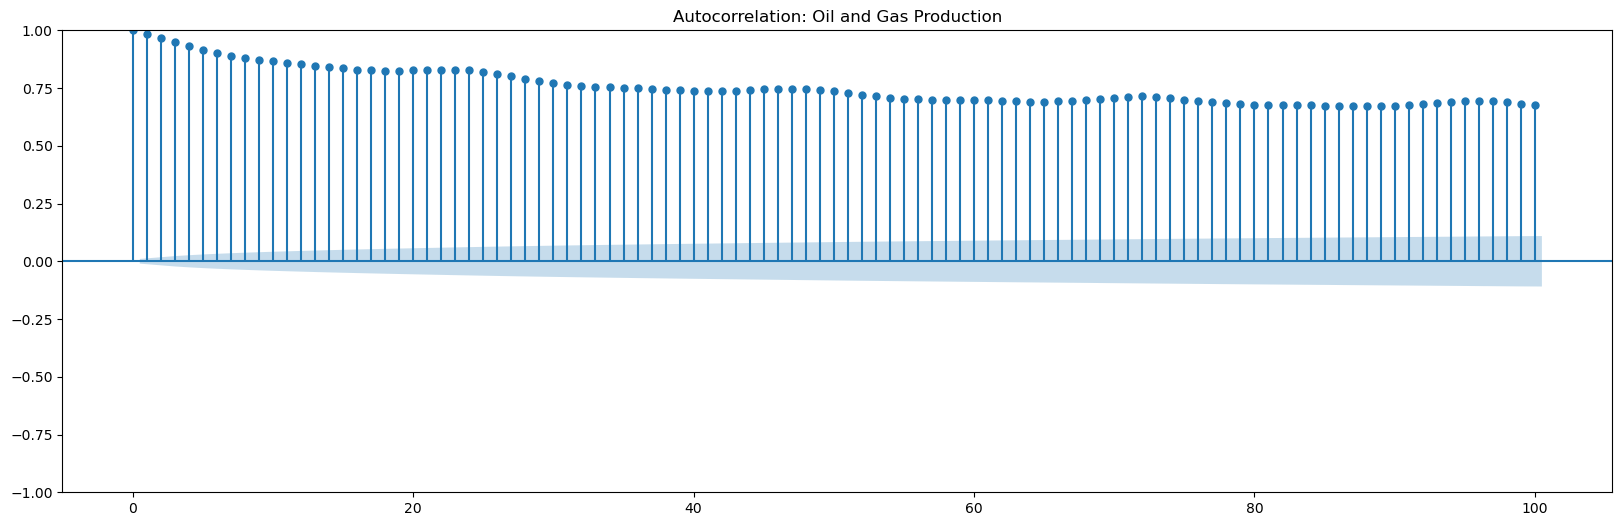

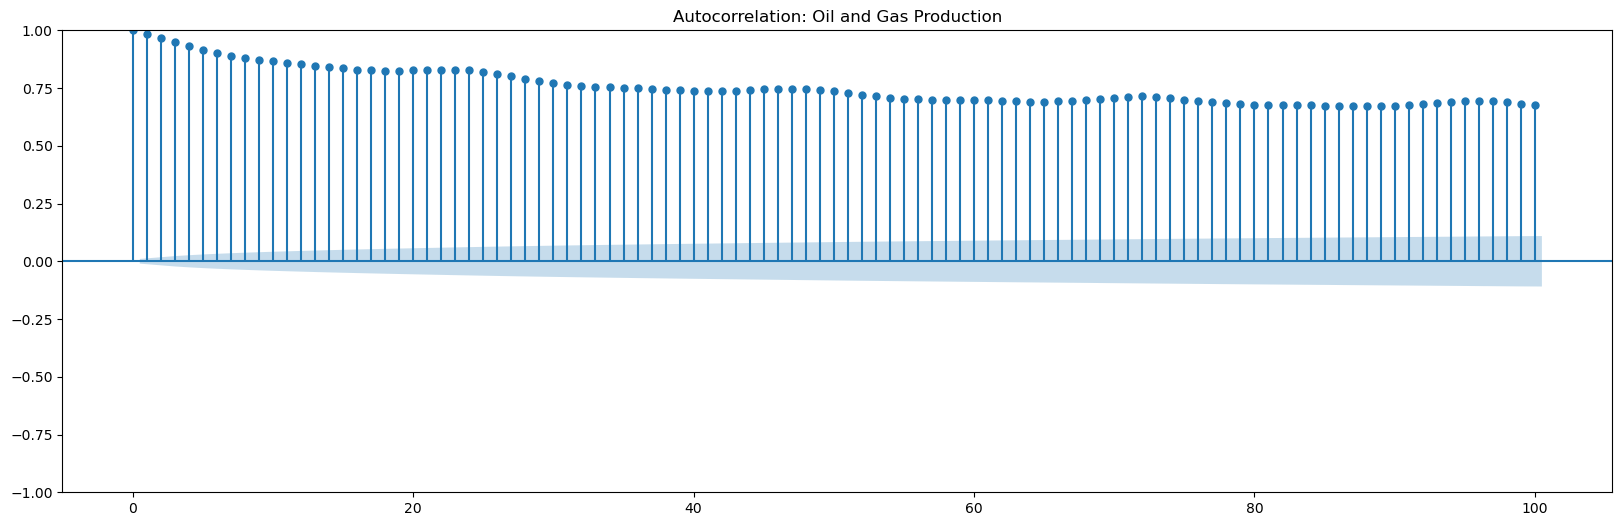

In [42]:
title = 'Autocorrelation: Oil and Gas Production'
lags= 100
plot_acf(df_oil["Oil and Gas"],title=title, lags =lags)

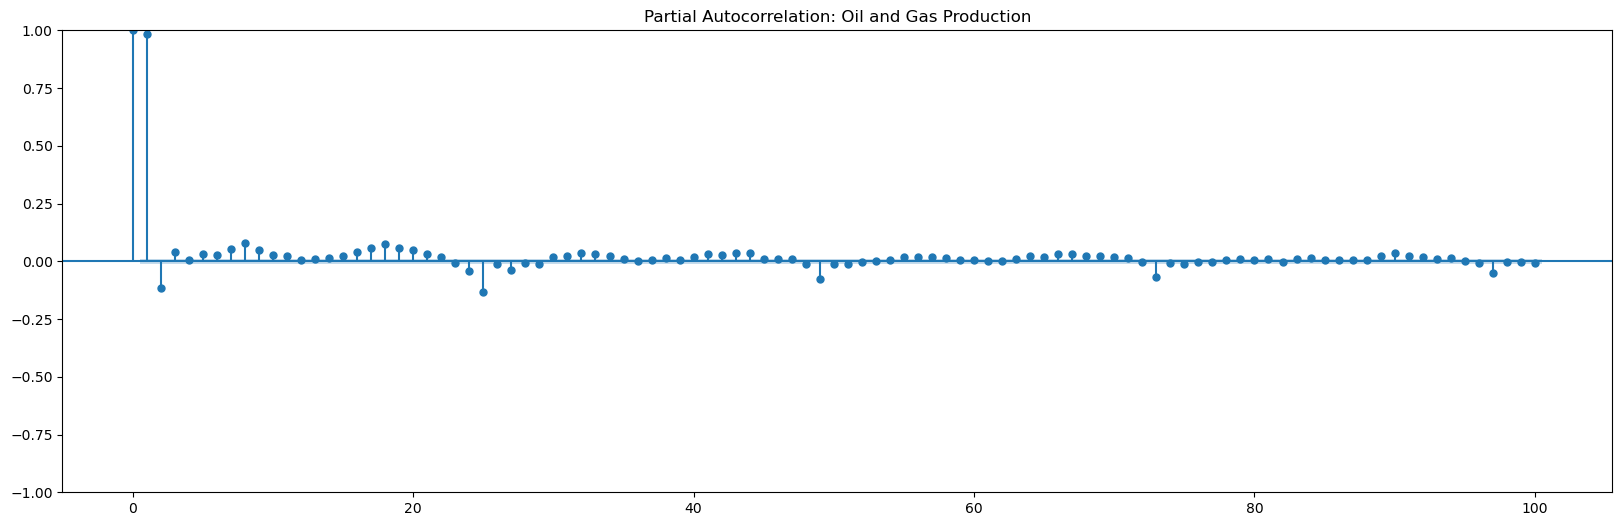

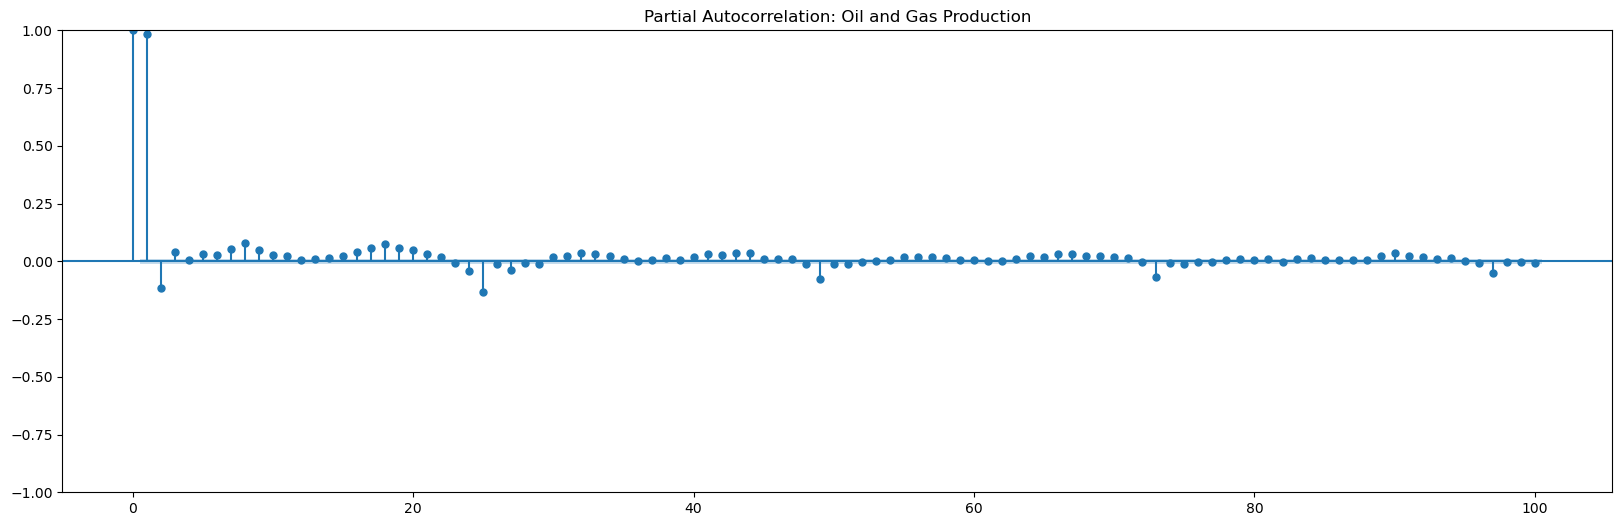

In [43]:
title='Partial Autocorrelation: Oil and Gas Production'
lags=100
plot_pacf(df_oil["Oil and Gas"],title=title,lags=lags)

In [44]:
print(df_oil["Oil and Gas"].index.duplicated().any())

True


In [45]:
duplicates = df_oil[df_oil["Oil and Gas"].index.duplicated(keep='first')]
print(duplicates)

                     Consumption  Production  Nuclear  Wind  Hydroelectric  \
DateTime                                                                     
2019-10-27 03:00:00         5196        4459     1373    74            725   
2019-10-27 03:00:00         5196        4459     1373    74            725   
2020-10-25 03:00:00         5220        5412     1418  1188           1098   
2020-10-25 03:00:00         5220        5412     1418  1188           1098   
2021-10-31 03:00:00         5341        5258     1415   141            934   
2021-10-31 03:00:00         5341        5258     1415   141            934   
2022-10-30 03:00:00         4503        5269     1384   544           1289   
2022-10-30 03:00:00         4503        5269     1384   544           1289   

                     Oil and Gas  Coal  Solar  Biomass       Date      Time  
DateTime                                                                     
2019-10-27 03:00:00          719  1515      0       50 2019-10-

In [46]:
df_oil = df_oil[~df_oil.index.duplicated(keep='first')]
df_oil.reset_index(inplace=True)

<Axes: >

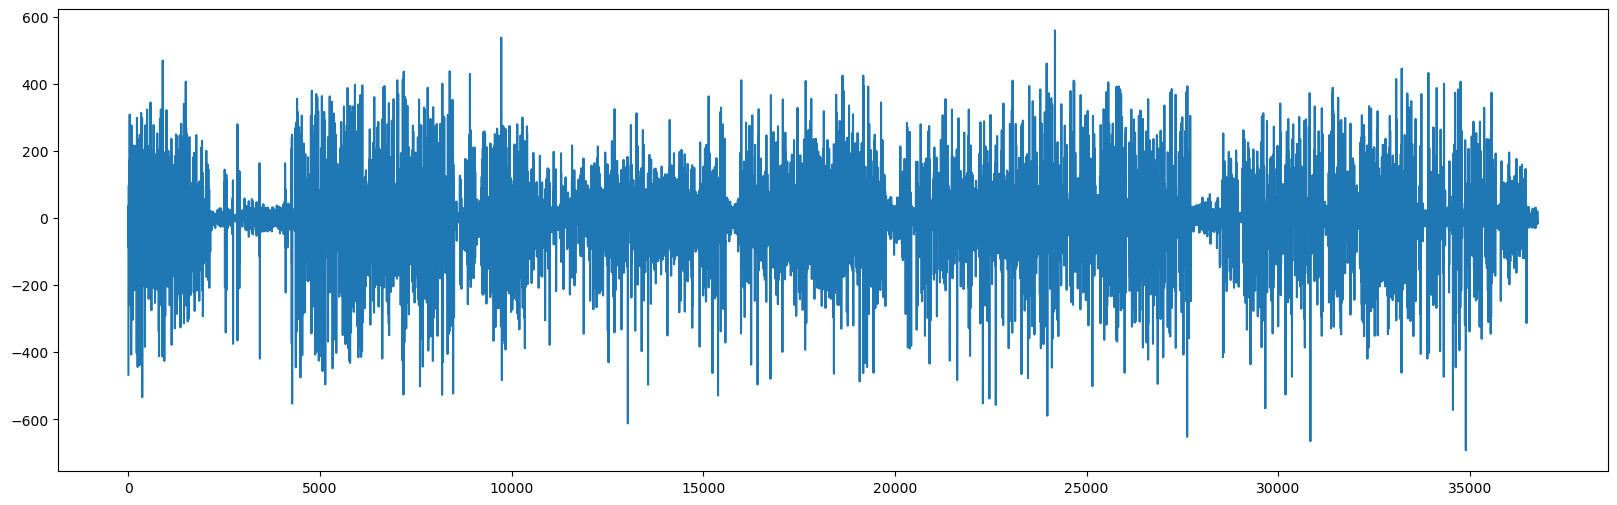

In [47]:
df_oil['d1'] = diff(df_oil["Oil and Gas"],k_diff= 1)
df_oil['d1'].plot()


In [48]:
df_oil.head()

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Date,Time,d1
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30,2019-01-01,00:00:00,NaN
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30,2019-01-01,01:00:00,-467.0
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30,2019-01-01,02:00:00,36.0
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30,2019-01-01,03:00:00,-10.0
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30,2019-01-01,04:00:00,-1.0


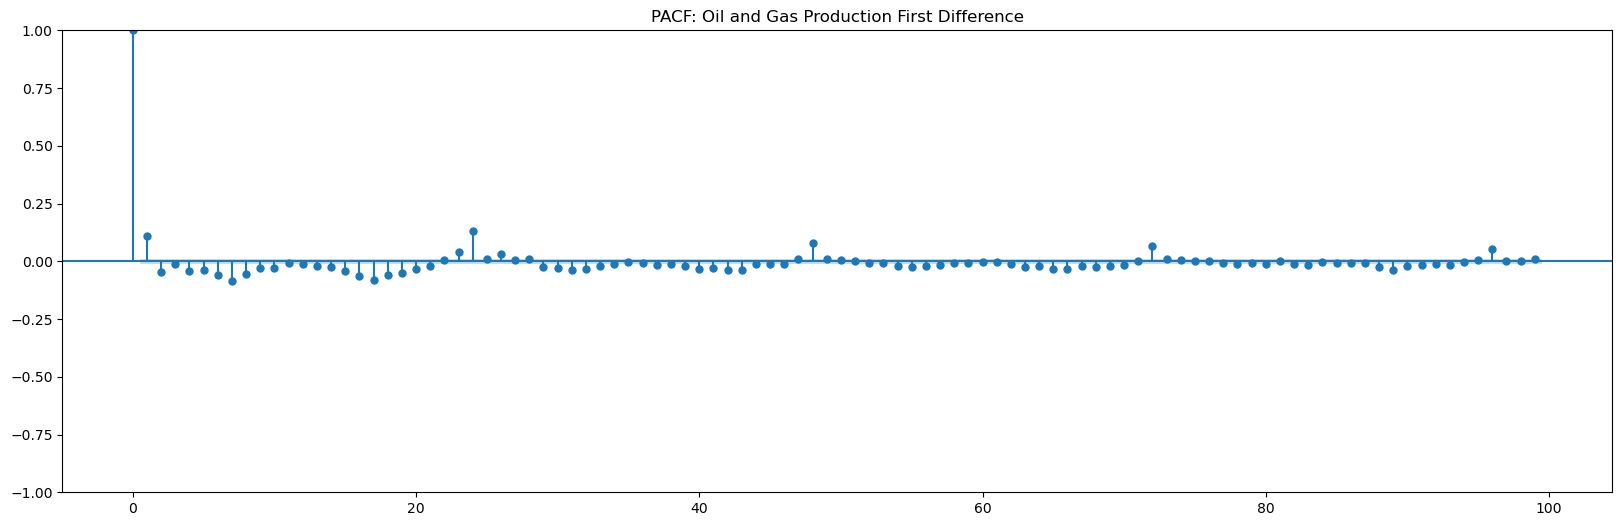

In [49]:
title='PACF: Oil and Gas Production First Difference'
lags=100
plot_pacf(df_oil['d1'].dropna(),title=title,lags=np.arange(lags));

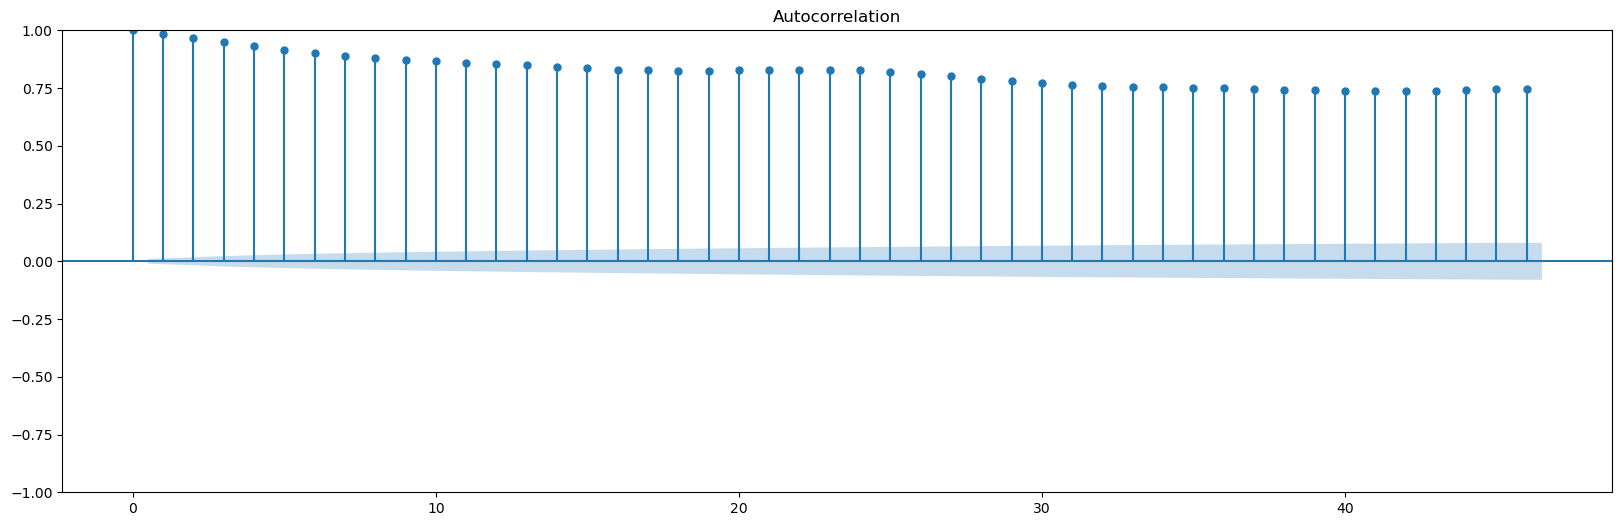

In [50]:
fig, ax = plt.subplots()

plot_acf(df_oil['Oil and Gas'],ax=ax);

# Fit AR Model for Consumption

In [51]:
from statsmodels.tsa.ar_model import ARResults, AutoReg


In [52]:
df_h= df.copy()
df_cons = df_h.resample('H').mean()
df_cons.index.freq = 'H'


In [56]:
print(train['Consumption'].isnull().sum())

0


In [57]:
print(test['Consumption'].isnull().sum())

0


In [60]:
train = df_cons.iloc[:26308]
test = df_cons.iloc[26308:] #2022-01-01

train.dropna(subset=['Consumption'], inplace=True)
test.dropna(subset=['Consumption'], inplace=True)

In [61]:
ar_model = AutoReg(train['Consumption'],lags=730) #one month
ar_fit = ar_model.fit()
print(f'Lag: {ar_fit}')
print(f'Coefficients:\n{ar_fit.params}')

C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Lag: <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x000001F97D38EA70>
Coefficients:
const               21.729906
Consumption.L1       1.038466
Consumption.L2      -0.079725
Consumption.L3      -0.007434
Consumption.L4      -0.009408
                      ...    
Consumption.L726     0.011677
Consumption.L727    -0.013288
Consumption.L728     0.006102
Consumption.L729    -0.007399
Consumption.L730     0.009459
Length: 731, dtype: float64


In [62]:
strt=len(train)
end=len(train)+len(test)-1
predictions1 = ar_fit.predict(start=strt, end=end).rename('AR Predictions 730')

C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


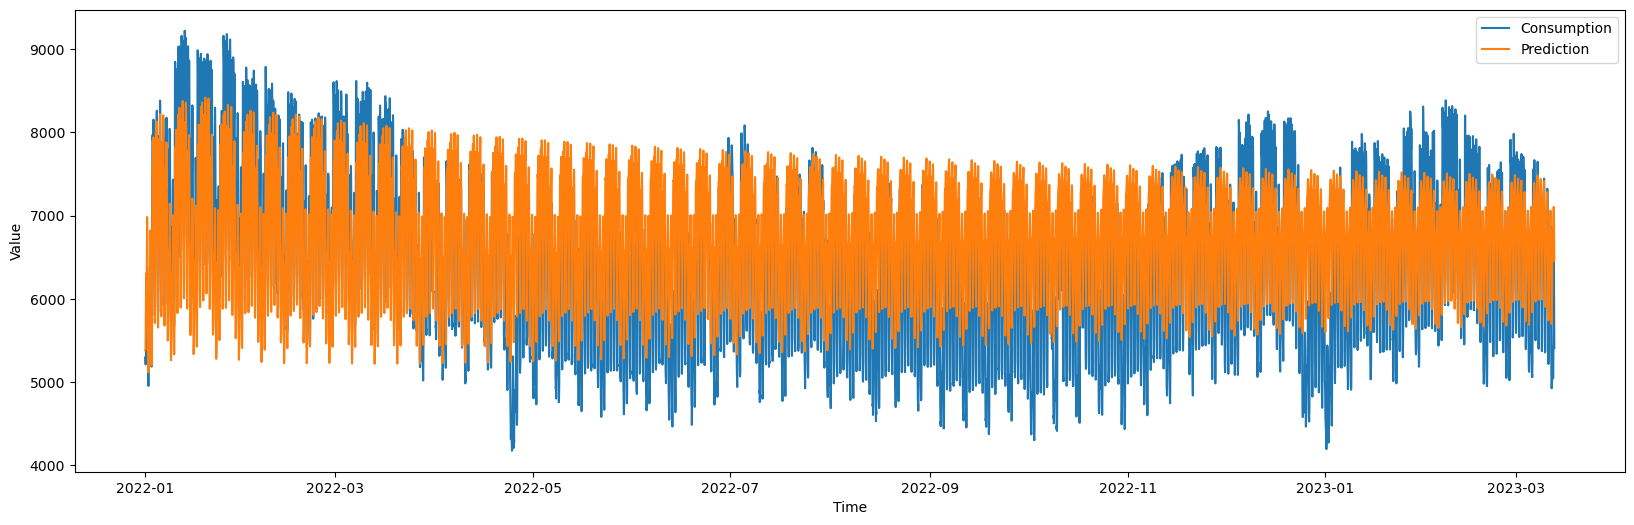

In [64]:
predictions1.index = test['Consumption'].index

plt.plot(test['Consumption'] , label= 'Consumption')
plt.plot(predictions1 , label= "Prediction")
plt.xlabel('Time')
plt.ylabel('Value')

plt.legend()
plt.show()

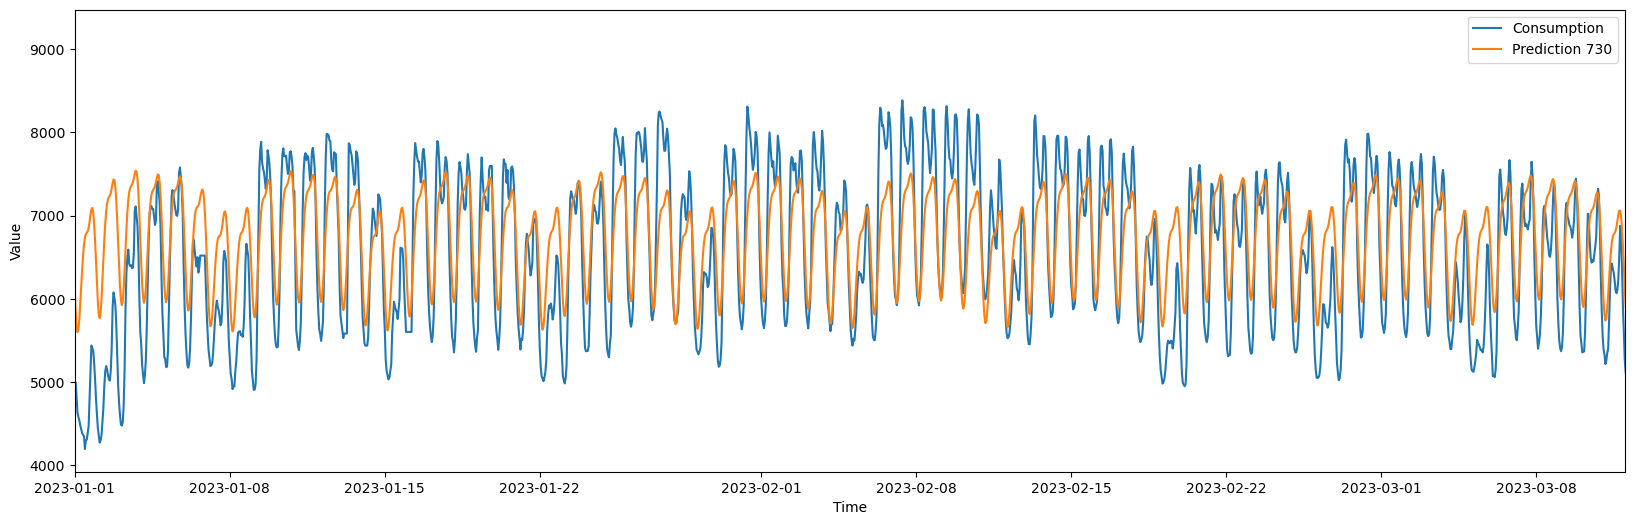

In [65]:
x_min = pd.Timestamp('2023-01-01')
x_max = pd.Timestamp('2023-03-12')

plt.plot(test['Consumption'] , label= 'Consumption' )
plt.plot(predictions1 , label= "Prediction 730" )
plt.xlabel('Time')
plt.ylabel('Value')


plt.xlim(x_min , x_max)  
plt.legend()
plt.show()

In [66]:
ar_model2 = AutoReg(train['Consumption'],lags=365) #15 days
ar_fit2 = ar_model2.fit()

C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [67]:
predictions2 = ar_fit2.predict(start=strt, end=end).rename('AR Predictions 365')

C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


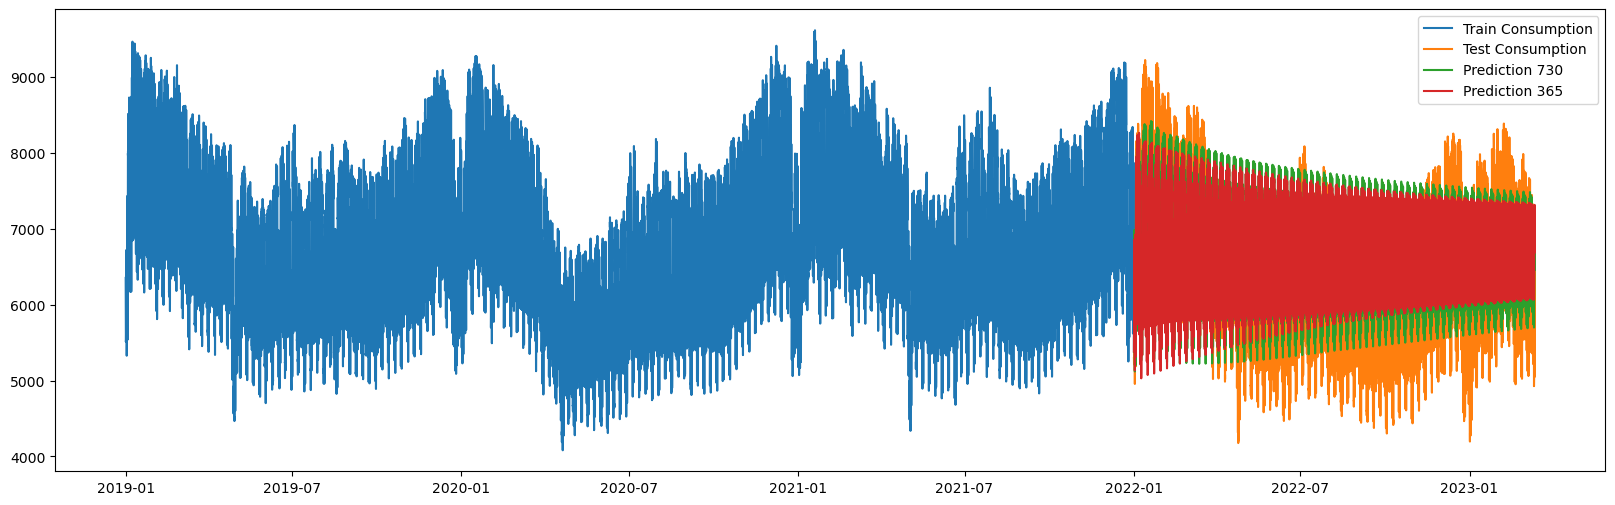

In [68]:
predictions1.index = test['Consumption'].index
predictions2.index = test['Consumption'].index

plt.plot(train['Consumption'] , label= 'Train Consumption')
plt.plot(test['Consumption'] , label= 'Test Consumption')
plt.plot(predictions1 , label= "Prediction 730")
plt.plot(predictions2 , label= "Prediction 365")

plt.legend()
#plt.xlim(x_min , x_max)  
plt.show()

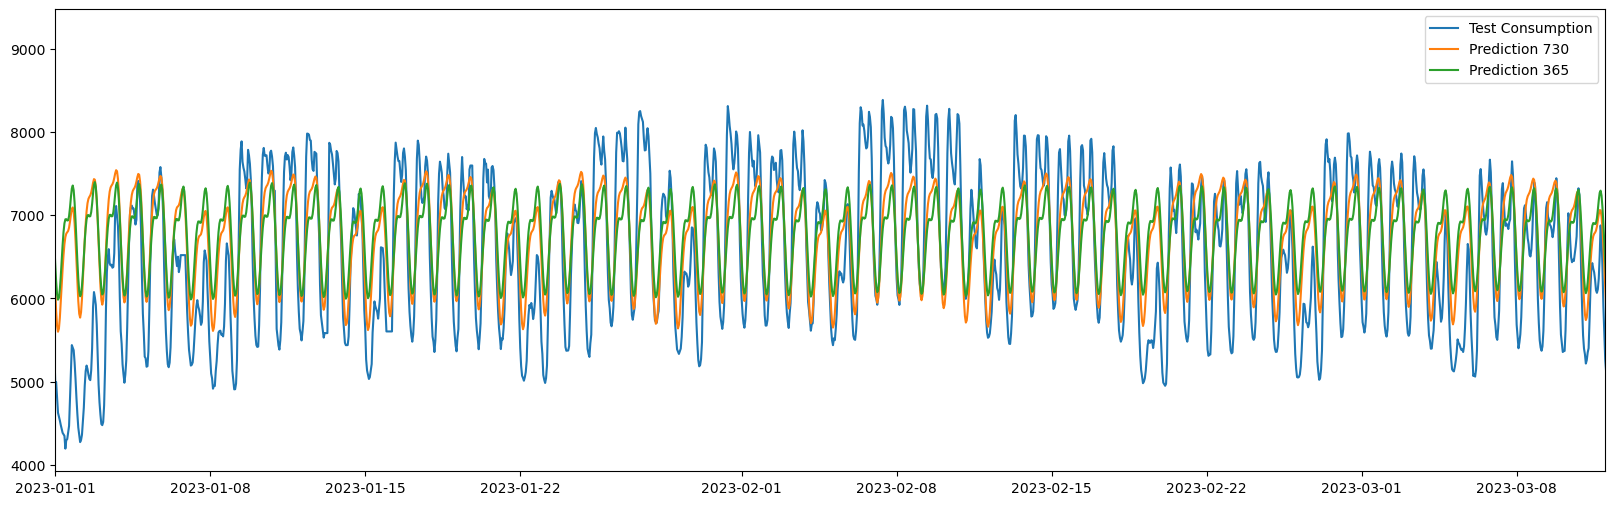

In [69]:
predictions1.index = test['Consumption'].index
predictions2.index = test['Consumption'].index

plt.plot(test['Consumption'] , label= 'Test Consumption')
plt.plot(predictions1 , label= "Prediction 730")
plt.plot(predictions2 , label= "Prediction 365")

plt.legend()
plt.xlim(x_min , x_max)  
plt.show()

### Evaluate the Model

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
labels = ['AR Predictions 730' , 'AR Predictions 365']
preds = [predictions1, predictions2]  

for i in range(2):
    error = mean_squared_error(test['Consumption'], preds[i])
    print(f'{labels[i]} Error: {error}')

AR Predictions 730 Error: 508925.56569455226
AR Predictions 365 Error: 632865.6951765097


In [72]:
modls = [ar_fit ,ar_fit2]

for i in range(2):
    print(f'{labels[i]} AIC: {modls[i]}')

AR Predictions 730 AIC: <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x000001F97D38EA70>
AR Predictions 365 AIC: <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x000001F91C4FE1D0>


# SARIMA Model for Production

In [73]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose  
from statsmodels.tools.eval_measures import mse,rmse

In [74]:
df_pro= df[df.index.year >= 2023].copy()
#I used data 2023-01-01 oneard to have faster calculation 

In [75]:
df_pro.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Date,Time
DateTime,,,,,,,,,,,
2023-01-01 00:00:00,4996,5842,1414,1028,1093,1411,881,0,31,2023-01-01,00:00:00
2023-01-01 01:00:00,4995,5843,1408,1028,1093,1401,881,0,32,2023-01-01,01:00:00
2023-01-01 02:00:00,4816,5774,1412,1095,966,1393,876,0,32,2023-01-01,02:00:00
2023-01-01 03:00:00,4627,5536,1409,1223,779,1280,812,0,32,2023-01-01,03:00:00
2023-01-01 04:00:00,4581,5410,1410,981,821,1327,838,0,32,2023-01-01,04:00:00


In [76]:
df_pro.shape

(1704, 11)

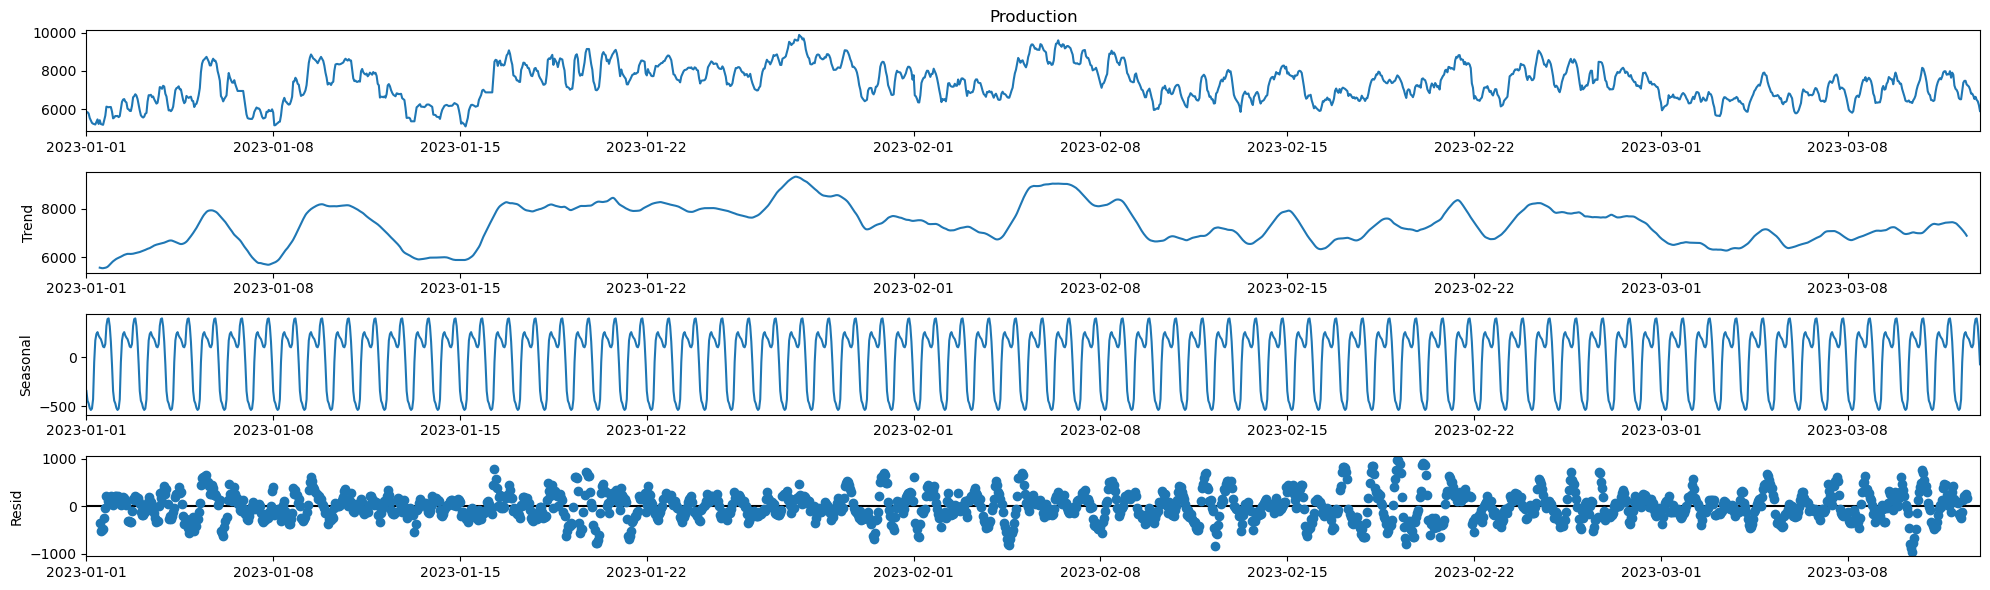

In [77]:
seas = seasonal_decompose(df_pro['Production'])
seas.plot();

In [78]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') 
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [79]:
adf_test(df_pro['Production'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -5.712080e+00
p-value                 7.260598e-07
# lags used             2.500000e+01
# observations          1.678000e+03
critical value (1%)    -3.434253e+00
critical value (5%)    -2.863264e+00
critical value (10%)   -2.567688e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [80]:
stepwise_fit = auto_arima(df_pro['Production'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22948.280, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22585.158, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22662.619, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22946.280, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=22584.118, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=22580.039, Time=0.23 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=22560.920, Time=0.27 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=22551.182, Time=0.36 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=22537.266, Time=0.38 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=22513.571, Time=3.35 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=22511.608, Time=2.91 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=22509.713, Time=2.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22511.706, Time=1.55 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=22514.156, Time=2.88 sec
 ARIMA(3,1,2)(0,0,0

In [81]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1704
Model:               SARIMAX(4, 1, 1)   Log Likelihood              -11247.865
Date:                Thu, 17 Aug 2023   AIC                          22507.729
Time:                        14:49:48   BIC                          22540.370
Sample:                    01-01-2023   HQIC                         22519.812
                         - 03-12-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2586      0.037     34.061      0.000       1.186       1.331
ar.L2         -0.2819      0.038     -7.449      0.000      -0.356      -0.208
ar.L3         -0.0718      0.043     -1.677      0.094      -0.156       0.012
ar.L4         -0.0551      0.031     -1.784      0.074      -0.116       0.005
ma.L1         -0.8795      0.030    -29.154      0.000      -0.939      -0.820
sigma2      3.192e+04    744.635     42.869      0.000    3.05e+04    3.34e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               576.42
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
stepwise_fit2 = auto_arima(df_pro['Production'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True) 

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=22948.280, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=22585.818, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=22663.723, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=22946.280, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=22585.158, Time=0.21 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=22586.429, Time=0.50 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.83 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=22584.118, Time=0.20 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=22583.685, Time=0.48 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=22224.796, Time=2.70 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=22182.117, Time=7.61 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=3.02 sec
 ARIMA(2,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=10.01 sec
 ARIMA(2,1,0)(1,0,2)[12] int

In [83]:
stepwise_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 1704
Model:             SARIMAX(6, 1, 0)x(2, 0, [1], 12)   Log Likelihood              -11074.884
Date:                              Thu, 17 Aug 2023   AIC                          22169.767
Time:                                      14:55:50   BIC                          22224.169
Sample:                                  01-01-2023   HQIC                         22189.905
                                       - 03-12-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2672      0.020     13.254      0.000       0.228       0.307
ar.L2          0.0918      0.024      3.789      0.000       0.044       0.139
ar.L3          0.0721      0.027      2.632      0.008       0.018       0.126
ar.L4         -0.0252      0.024     -1.031      0.303      -0.073       0.023
ar.L5         -0.0175      0.022     -0.806      0.420      -0.060       0.025
ar.L6         -0.0706      0.023     -3.113      0.002      -0.115      -0.026
ar.S.L12       0.6242      0.031     20.380      0.000       0.564       0.684
ar.S.L24       0.3216      0.024     13.507      0.000       0.275       0.368
ma.S.L12      -0.7633      0.024    -32.107      0.000      -0.810      -0.717
sigma2      2.588e+04    594.259     43.557      0.000    2.47e+04     2.7e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               625.75
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.20
Prob(H) (two-sided):                  0.12   Kurtosis:                         5.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
train = df_pro.iloc[:1200]#2023-01-01 
test = df_pro.iloc[1200:] #2023-02-20

In [85]:
pro_model = SARIMAX(train['Production'],order=(6,1,0),seasonal_order=(2,0,1,12))
pro_sarima = pro_model.fit()
pro_sarima.summary()

C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Production   No. Observations:                 1200
Model:             SARIMAX(6, 1, 0)x(2, 0, [1], 12)   Log Likelihood               -7788.742
Date:                              Thu, 17 Aug 2023   AIC                          15597.485
Time:                                      14:57:28   BIC                          15648.377
Sample:                                  01-01-2023   HQIC                         15616.656
                                       - 02-19-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2603      0.023     11.286      0.000       0.215       0.306
ar.L2          0.1144      0.031      3.720      0.000       0.054       0.175
ar.L3          0.0547      0.033      1.655      0.098      -0.010       0.120
ar.L4         -0.0435      0.029     -1.495      0.135      -0.100       0.013
ar.L5          0.0166      0.028      0.589      0.556      -0.039       0.072
ar.L6         -0.0657      0.027     -2.451      0.014      -0.118      -0.013
ar.S.L12       0.4053      0.042      9.620      0.000       0.323       0.488
ar.S.L24       0.4379      0.025     17.354      0.000       0.388       0.487
ma.S.L12      -0.5120      0.040    -12.775      0.000      -0.591      -0.433
sigma2      2.546e+04    751.259     33.885      0.000     2.4e+04    2.69e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               277.44
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
strt=len(train)
end=len(train)+len(test)-1
predictions2 = pro_sarima.predict(start=strt, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions 12')

In [87]:
#comparing two values
for i in range(len(predictions2)):
    print(f"predicted={predictions2[i]:<11.10}, expected={test['Production'][i]}")

predicted=7188.079816, expected=7122
predicted=7192.556122, expected=7576
predicted=7251.909782, expected=7612
predicted=7313.532515, expected=7547
predicted=7296.471354, expected=7516
predicted=7260.995836, expected=7337
predicted=7196.949186, expected=7040
predicted=7152.892528, expected=6921
predicted=7091.454049, expected=6838
predicted=7009.719007, expected=7171
predicted=6916.699895, expected=7343
predicted=6852.444657, expected=7262
predicted=6997.241626, expected=7135
predicted=7044.848878, expected=7367
predicted=7054.349104, expected=7269
predicted=6978.484136, expected=7148
predicted=6952.046634, expected=7207
predicted=6896.291972, expected=7027
predicted=6945.820333, expected=7505
predicted=7080.888849, expected=7624
predicted=7098.380073, expected=7734
predicted=7068.796734, expected=7804
predicted=6997.741429, expected=8032
predicted=6998.333872, expected=8064
predicted=7033.772285, expected=7927
predicted=7055.061468, expected=8212
predicted=7084.900662, expected=8196
p

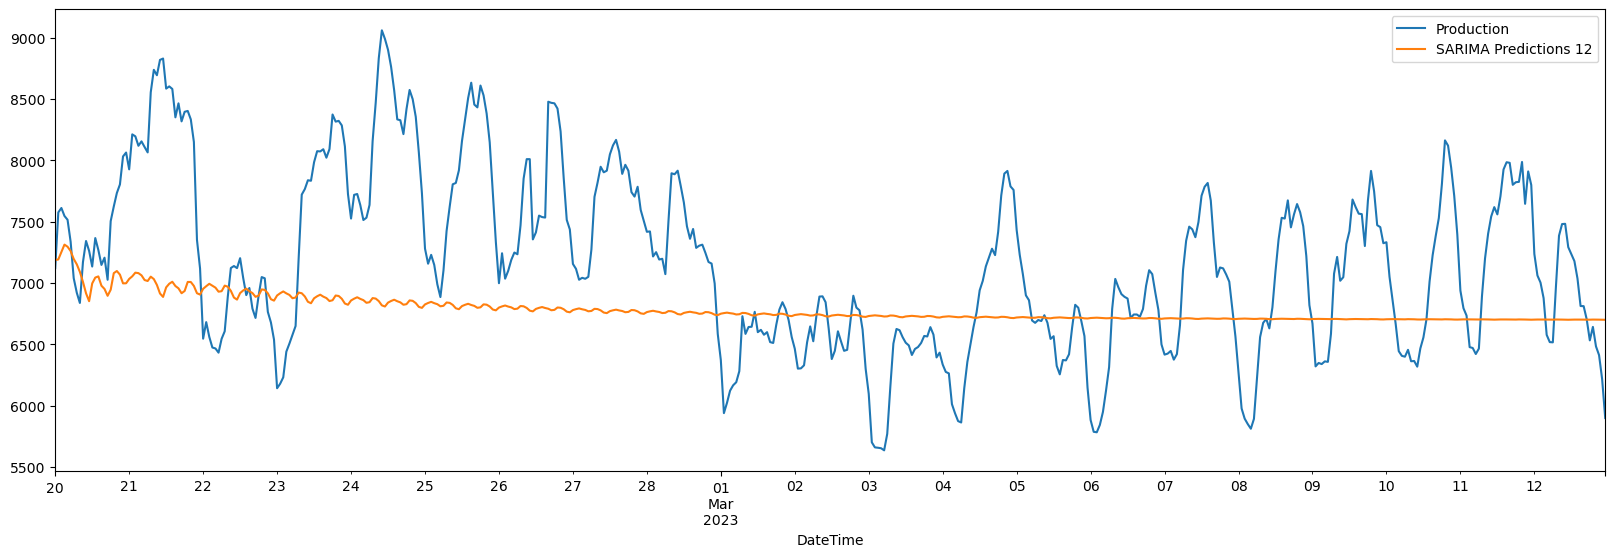

In [88]:
#predictions.index = test['Production'].index

ax = test['Production'].plot(legend=True)
predictions2.plot(legend=True)
ax.autoscale(axis='x',tight=True);
#ax.set(xlabel=xlabel, ylabel=ylabel);

In [89]:
stepwise_fit3 = auto_arima(df_pro['Production'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=24,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=2.06 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=22948.280, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=22238.390, Time=1.78 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=22423.116, Time=1.62 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=22946.280, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=22585.158, Time=0.12 sec
 ARIMA(1,1,0)(2,0,0)[24] intercept   : AIC=22126.084, Time=8.00 sec
 ARIMA(1,1,0)(2,0,1)[24] intercept   : AIC=inf, Time=25.01 sec
 ARIMA(1,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=5.46 sec
 ARIMA(0,1,0)(2,0,0)[24] intercept   : AIC=22261.197, Time=5.91 sec
 ARIMA(2,1,0)(2,0,0)[24] intercept   : AIC=22111.900, Time=9.74 sec
 ARIMA(2,1,0)(1,0,0)[24] intercept   : AIC=22225.420, Time=2.04 sec
 ARIMA(2,1,0)(2,0,1)[24] intercept   : AIC=inf, Time=43.64 sec
 ARIMA(2,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=9.07 sec
 ARIMA(3,1,0)(2,0,0)[24] intercep

In [90]:
stepwise_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1704
Model:             SARIMAX(6, 1, 0)x(2, 0, 0, 24)   Log Likelihood              -11040.201
Date:                            Thu, 17 Aug 2023   AIC                          22098.401
Time:                                    15:17:30   BIC                          22147.362
Sample:                                01-01-2023   HQIC                         22116.525
                                     - 03-12-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2506      0.020     12.663      0.000       0.212       0.289
ar.L2          0.0933      0.025      3.787      0.000       0.045       0.142
ar.L3          0.0599      0.028      2.125      0.034       0.005       0.115
ar.L4         -0.0332      0.026     -1.300      0.193      -0.083       0.017
ar.L5         -0.0497      0.022     -2.273      0.023      -0.093      -0.007
ar.L6         -0.0558      0.024     -2.323      0.020      -0.103      -0.009
ar.S.L24       0.3331      0.019     17.757      0.000       0.296       0.370
ar.S.L48       0.2614      0.017     15.060      0.000       0.227       0.295
sigma2      2.485e+04    570.148     43.590      0.000    2.37e+04     2.6e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               594.14
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.19
Prob(H) (two-sided):                  0.24   Kurtosis:                         5.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
pro2_model = SARIMAX(train['Production'],order=(6,1,0),seasonal_order=(2,0,0,24))
pro2_sarima = pro2_model.fit()
pro2_sarima.summary()

C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Production   No. Observations:                 1200
Model:             SARIMAX(6, 1, 0)x(2, 0, 0, 24)   Log Likelihood               -7762.778
Date:                            Thu, 17 Aug 2023   AIC                          15543.557
Time:                                    15:17:44   BIC                          15589.360
Sample:                                01-01-2023   HQIC                         15560.811
                                     - 02-19-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2444      0.022     11.080      0.000       0.201       0.288
ar.L2          0.1179      0.030      3.927      0.000       0.059       0.177
ar.L3          0.0476      0.033      1.423      0.155      -0.018       0.113
ar.L4         -0.0514      0.029     -1.764      0.078      -0.109       0.006
ar.L5         -0.0229      0.028     -0.817      0.414      -0.078       0.032
ar.L6         -0.0484      0.027     -1.784      0.074      -0.102       0.005
ar.S.L24       0.3828      0.023     16.317      0.000       0.337       0.429
ar.S.L48       0.2329      0.020     11.437      0.000       0.193       0.273
sigma2      2.435e+04    706.367     34.469      0.000     2.3e+04    2.57e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               293.48
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
strt=len(train)
end=len(train)+len(test)-1
predictions3 = pro2_sarima.predict(start=strt, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions 24')

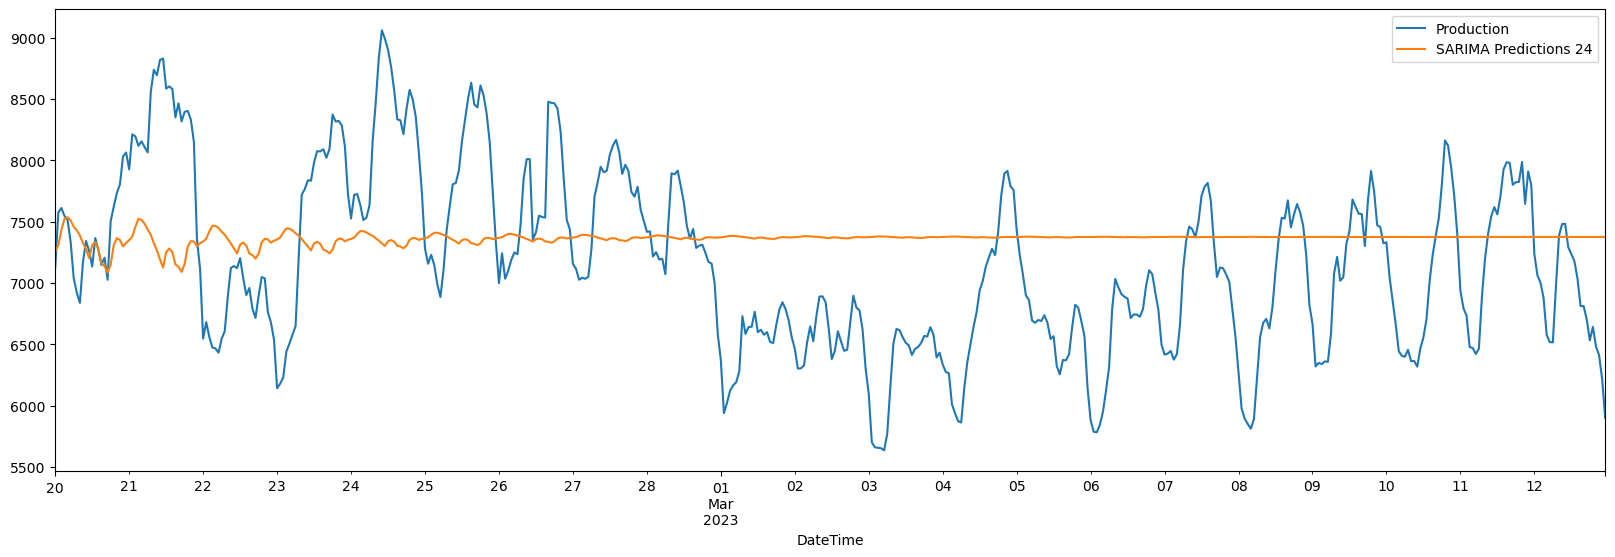

In [93]:
predictions3.index = test['Production'].index

ax = test['Production'].plot(legend=True)
predictions3.plot(legend=True)
ax.autoscale(axis='x',tight=True);

In [94]:
stepwise_fit4 = auto_arima(df_pro['Production'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=6,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True) 

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[6] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[6] intercept   : AIC=22948.280, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[6] intercept   : AIC=22575.131, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[6] intercept   : AIC=22638.385, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[6]             : AIC=22946.280, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[6] intercept   : AIC=22585.158, Time=0.11 sec
 ARIMA(1,1,0)(2,0,0)[6] intercept   : AIC=22576.215, Time=0.68 sec
 ARIMA(1,1,0)(1,0,1)[6] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(1,1,0)(0,0,1)[6] intercept   : AIC=22575.708, Time=0.33 sec
 ARIMA(1,1,0)(2,0,1)[6] intercept   : AIC=inf, Time=2.47 sec
 ARIMA(0,1,0)(1,0,0)[6] intercept   : AIC=22885.270, Time=0.47 sec
 ARIMA(2,1,0)(1,0,0)[6] intercept   : AIC=22574.605, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[6] intercept   : AIC=22584.118, Time=0.20 sec
 ARIMA(2,1,0)(2,0,0)[6] intercept   : AIC=22574.845, Time=0.77 sec
 ARIMA(2,1,0)(1,0,1)[6] intercept   :

In [95]:
pro3_model = SARIMAX(train['Production'],order=(4,1,1),seasonal_order=(0,0,0,6),enforce_invertibility=False)
pro3_sarima = pro3_model.fit()
pro3_sarima.summary()

C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                 1200
Model:               SARIMAX(4, 1, 1)   Log Likelihood               -7935.962
Date:                Thu, 17 Aug 2023   AIC                          15883.923
Time:                        15:22:01   BIC                          15914.459
Sample:                    01-01-2023   HQIC                         15895.426
                         - 02-19-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1991      0.059     20.386      0.000       1.084       1.314
ar.L2         -0.2522      0.048     -5.233      0.000      -0.347      -0.158
ar.L3         -0.0793      0.051     -1.542      0.123      -0.180       0.022
ar.L4         -0.0671      0.040     -1.693      0.090      -0.145       0.011
ma.L1         -0.8139      0.053    -15.302      0.000      -0.918      -0.710
sigma2      3.283e+04    935.650     35.085      0.000     3.1e+04    3.47e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               398.62
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             0.33
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
strt=len(train)
end=len(train)+len(test)-1
predictions4 = pro3_sarima.predict(start=strt, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions 6')

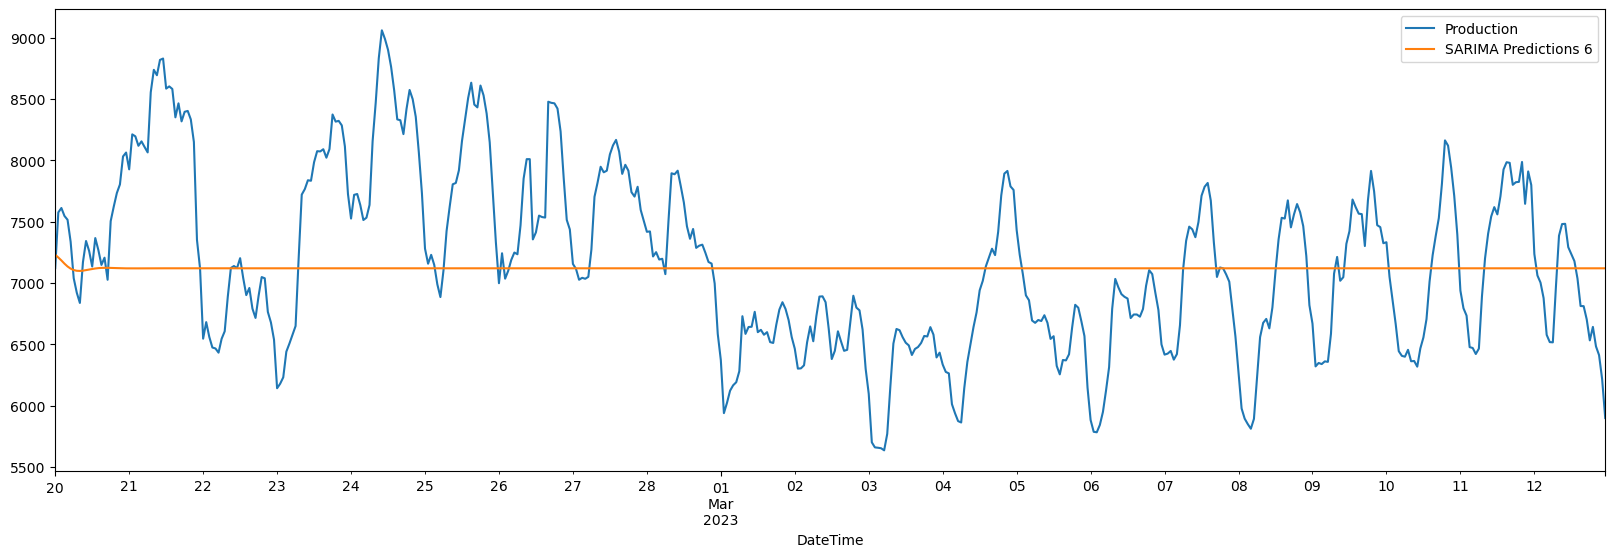

In [97]:
predictions4.index = test['Production'].index

ax = test['Production'].plot(legend=True)
predictions4.plot(legend=True)
ax.autoscale(axis='x',tight=True);

In [98]:
error1 = mse(test['Production'], predictions2)
error2 = rmse(test['Production'], predictions2)

print(f'SARIMA MSE Error: {error1}')
print(f'SARIMA RMSE Error: {error2}')

SARIMA MSE Error: 616102.165614587
SARIMA RMSE Error: 784.9217576386751


In [99]:
error3 = mse(test['Production'], predictions3)
error4 = rmse(test['Production'], predictions3)

print(f'SARIMA MSE Error: {error3}')
print(f'SARIMA RMSE Error: {error4}')

SARIMA MSE Error: 575161.3601490133
SARIMA RMSE Error: 758.3939346731443


# VAR for Biomass and Production
## Vector AutoRegressive Moving Average

In [101]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults

In [102]:
df_b = df[df.index.year >= 2023].copy()

In [103]:
df_bio = df_b[["Biomass" , "Production"]]

In [104]:
df_bio.head()

,Biomass,Production
DateTime,,
2023-01-01 00:00:00,31,5842
2023-01-01 01:00:00,32,5843
2023-01-01 02:00:00,32,5774
2023-01-01 03:00:00,32,5536
2023-01-01 04:00:00,32,5410


In [105]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [106]:
adf_test(df_bio['Biomass'],title='Biomass ADF')

Augmented Dickey-Fuller Test: Biomass ADF
ADF test statistic        -3.449294
p-value                    0.009389
# lags used               25.000000
# observations          1678.000000
critical value (1%)       -3.434253
critical value (5%)       -2.863264
critical value (10%)      -2.567688
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [107]:
adf_test(df_bio['Production'],title='Production ADF')

Augmented Dickey-Fuller Test: Production ADF
ADF test statistic     -5.712080e+00
p-value                 7.260598e-07
# lags used             2.500000e+01
# observations          1.678000e+03
critical value (1%)    -3.434253e+00
critical value (5%)    -2.863264e+00
critical value (10%)   -2.567688e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [108]:
auto_arima(df_bio['Biomass'],maxiter=1000)


ARIMA(maxiter=1000, order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [109]:
auto_arima(df_bio['Production'],maxiter=1000)

ARIMA(maxiter=1000, order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [110]:
df_transformed = df_bio.diff().diff()

In [111]:
df_transformed = df_transformed.dropna()
df_transformed.head()

,Biomass,Production
DateTime,,
2023-01-01 02:00:00,-1.0,-70.0
2023-01-01 03:00:00,0.0,-169.0
2023-01-01 04:00:00,0.0,112.0
2023-01-01 05:00:00,0.0,0.0
2023-01-01 06:00:00,-2.0,81.0


In [112]:
#df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['Biomass'], title='Biomass FirstDiff')
print()
adf_test(df_transformed['Production'], title='Production FirstDiff')

Augmented Dickey-Fuller Test: Biomass FirstDiff
ADF test statistic     -1.792417e+01
p-value                 2.898886e-30
# lags used             2.500000e+01
# observations          1.676000e+03
critical value (1%)    -3.434258e+00
critical value (5%)    -2.863266e+00
critical value (10%)   -2.567689e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: Production FirstDiff
ADF test statistic     -1.618234e+01
p-value                 4.253625e-29
# lags used             2.500000e+01
# observations          1.676000e+03
critical value (1%)    -3.434258e+00
critical value (5%)    -2.863266e+00
critical value (10%)   -2.567689e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [113]:
df_transformed.head()

,Biomass,Production
DateTime,,
2023-01-01 02:00:00,-1.0,-70.0
2023-01-01 03:00:00,0.0,-169.0
2023-01-01 04:00:00,0.0,112.0
2023-01-01 05:00:00,0.0,0.0
2023-01-01 06:00:00,-2.0,81.0


In [114]:
len(df_bio)

1704

In [115]:
len(df_transformed)

1702

In [116]:
nobs= 720 #one month
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [117]:
print(train.shape)
print(test.shape)

(982, 2)
(720, 2)


## Fit the VARMA(1,2) Model


In [118]:
model_var = VARMAX(train, order=(1,2), trend='c')
varma12 = model_var.fit(maxiter=1000, disp=False)
varma12.summary()

C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Dep. Variable:,"['Biomass', 'Production']",No. Observations:,982
Model:,"VARMA(1,2)",Log Likelihood,-8464.890
,+ intercept,AIC,16963.779
Date:,"Thu, 17 Aug 2023",BIC,17046.902
Time:,20:58:18,HQIC,16995.400
Sample:,01-01-2023,,
,- 02-10-2023,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"8.54, 0.03",Jarque-Bera (JB):,"7470.52, 462.67"
Prob(Q):,"0.00, 0.86",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"2.18, 1.04",Skew:,"-0.59, 0.20"


In [119]:
df_forecast = varma12.forecast(720)
df_forecast

,Biomass,Production
2023-02-11 00:00:00,2.009307,50.473261
2023-02-11 01:00:00,-0.271839,48.148804
2023-02-11 02:00:00,0.276128,-0.404399
2023-02-11 03:00:00,-0.172190,0.207331
2023-02-11 04:00:00,0.106640,-0.395086
...,...,...
2023-03-12 19:00:00,-0.000470,-0.164700
2023-03-12 20:00:00,-0.000470,-0.164700
2023-03-12 21:00:00,-0.000470,-0.164700
2023-03-12 22:00:00,-0.000470,-0.164700


In [120]:
#adding first diff
df_forecast['Bio1st'] = (df_bio['Biomass'].iloc[-nobs-1]-df_bio['Biomass'].iloc[-nobs-2]) + df_forecast['Biomass'].cumsum()
#forecast value
df_forecast['BioForecast'] = df_bio['Biomass'].iloc[-nobs-1] + df_forecast['Biomass'].cumsum()

In [121]:
#adding first diff
df_forecast['Pro1st'] = (df_bio['Production'].iloc[-nobs-1]-df_bio['Production'].iloc[-nobs-2]) + df_forecast['Production'].cumsum()
#forecast value
df_forecast['ProForecast'] = df_bio['Production'].iloc[-nobs-1] + df_forecast['Production'].cumsum()

In [122]:
df_forecast

,Biomass,Production,Bio1st,BioForecast,Pro1st,ProForecast
2023-02-11 00:00:00,2.009307,50.473261,0.009307,67.009307,-76.526739,7187.473261
2023-02-11 01:00:00,-0.271839,48.148804,-0.262533,66.737467,-28.377936,7235.622064
2023-02-11 02:00:00,0.276128,-0.404399,0.013595,67.013595,-28.782335,7235.217665
2023-02-11 03:00:00,-0.172190,0.207331,-0.158595,66.841405,-28.575003,7235.424997
2023-02-11 04:00:00,0.106640,-0.395086,-0.051955,66.948045,-28.970089,7235.029911
...,...,...,...,...,...,...
2023-03-12 19:00:00,-0.000470,-0.164700,-0.427487,66.572513,-145.983362,7118.016638
2023-03-12 20:00:00,-0.000470,-0.164700,-0.427957,66.572043,-146.148062,7117.851938
2023-03-12 21:00:00,-0.000470,-0.164700,-0.428427,66.571573,-146.312762,7117.687238
2023-03-12 22:00:00,-0.000470,-0.164700,-0.428898,66.571102,-146.477462,7117.522538


In [123]:
pd.concat([df_bio.iloc[-720:],df_forecast[['BioForecast','ProForecast']]],axis=1)

,Biomass,Production,BioForecast,ProForecast
2023-02-11 00:00:00,65,6827,67.009307,7187.473261
2023-02-11 01:00:00,65,6624,66.737467,7235.622064
2023-02-11 02:00:00,64,6490,67.013595,7235.217665
2023-02-11 03:00:00,65,6375,66.841405,7235.424997
2023-02-11 04:00:00,65,6226,66.948045,7235.029911
...,...,...,...,...
2023-03-12 19:00:00,60,6643,66.572513,7118.016638
2023-03-12 20:00:00,60,6484,66.572043,7117.851938
2023-03-12 21:00:00,62,6413,66.571573,7117.687238
2023-03-12 22:00:00,61,6217,66.571102,7117.522538


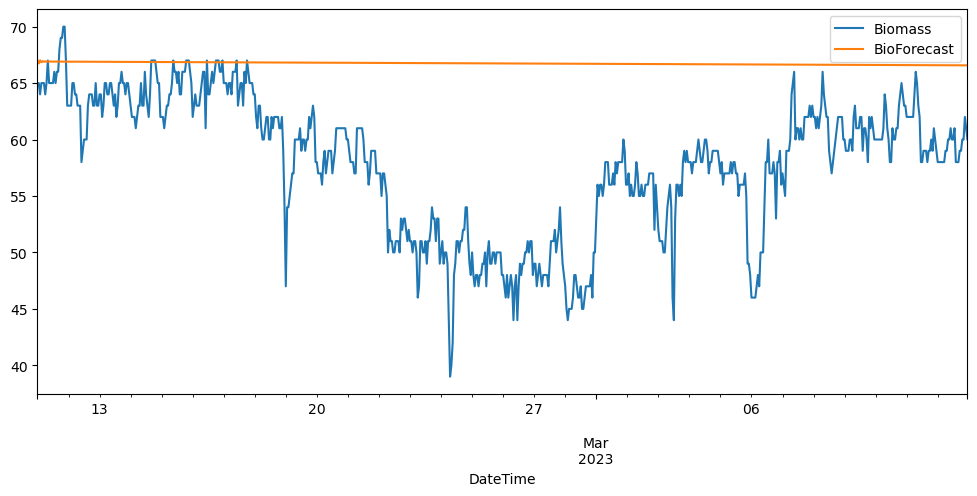

In [124]:
df_bio['Biomass'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['BioForecast'].plot(legend=True);

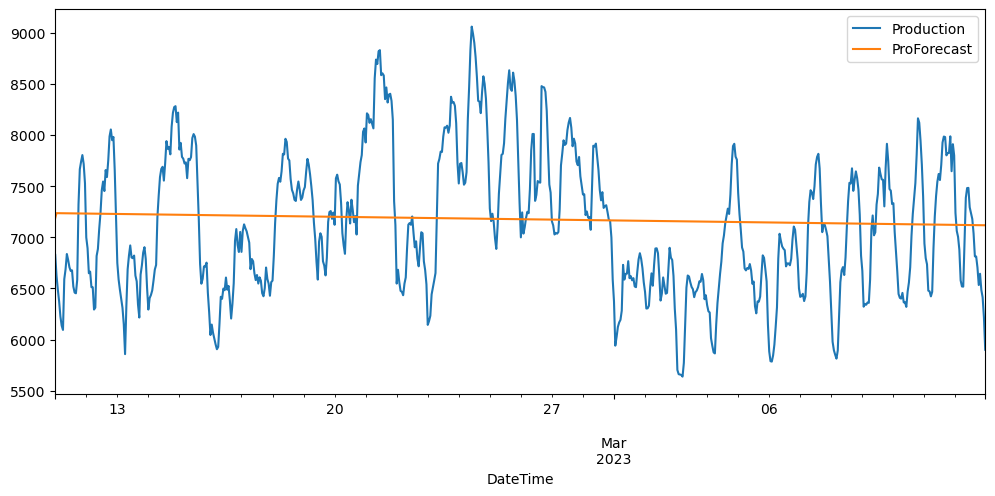

In [399]:
df_bio['Production'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['ProForecast'].plot(legend=True);

## Evaluation 

In [125]:
RMSE1 = rmse(df_bio['Biomass'][-nobs:], df_forecast['BioForecast'])
print(f'Biomass VAR(6) RMSE: {RMSE1:.3f}')

Biomass VAR(6) RMSE: 10.840


In [126]:
RMSE2 = rmse(df_bio['Production'][-nobs:], df_forecast['ProForecast'])
print(f'Production VAR(6) RMSE: {RMSE2:.3f}')

Production VAR(6) RMSE: 682.858


##  Compare with SARIMA

In [127]:
from statsmodels.tsa.arima_model import ARIMA

### Biomass 

In [128]:
model_ar = SARIMAX(train['Biomass'],order =(1,1,1))
ARfit_bio = model_ar.fit()
ARfit_bio.summary()

C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Biomass   No. Observations:                  982
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2130.824
Date:                Thu, 17 Aug 2023   AIC                           4267.648
Time:                        20:59:02   BIC                           4282.314
Sample:                    01-01-2023   HQIC                          4273.228
                         - 02-10-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5416      0.014    -37.600      0.000      -0.570      -0.513
ma.L1         -0.9999      0.508     -1.968      0.049      -1.996      -0.004
sigma2         4.4735      2.253      1.986      0.047       0.059       8.888
===================================================================================
Ljung-Box (L1) (Q):                  37.19   Jarque-Bera (JB):              5455.50
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.35   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [129]:
start=len(train)
end=len(train)+len(test)-1
z1 = ARfit_bio.predict(start=start, end=end).rename('Biomass')
z1 = pd.DataFrame(z1)

In [130]:
z1

,Biomass
2023-02-11 00:00:00,1.622377
2023-02-11 01:00:00,-0.881234
2023-02-11 02:00:00,0.474793
2023-02-11 03:00:00,-0.259670
2023-02-11 04:00:00,0.138136
...,...
2023-03-12 19:00:00,-0.001627
2023-03-12 20:00:00,-0.001627
2023-03-12 21:00:00,-0.001627
2023-03-12 22:00:00,-0.001627


In [131]:
#adding first diff
z1['Bio1st'] = (df_bio['Biomass'].iloc[-nobs-1]-df_bio['Biomass'].iloc[-nobs-1]) + z1['Biomass'].cumsum()
#build the forecast values
z1['BioForecast'] = df_bio['Biomass'].iloc[-nobs-1] + z1['Biomass'].cumsum()

In [132]:
z1

,Biomass,Bio1st,BioForecast
2023-02-11 00:00:00,1.622377,1.622377,66.622377
2023-02-11 01:00:00,-0.881234,0.741143,65.741143
2023-02-11 02:00:00,0.474793,1.215936,66.215936
2023-02-11 03:00:00,-0.259670,0.956266,65.956266
2023-02-11 04:00:00,0.138136,1.094402,66.094402
...,...,...,...
2023-03-12 19:00:00,-0.001627,-0.111554,64.888446
2023-03-12 20:00:00,-0.001627,-0.113181,64.886819
2023-03-12 21:00:00,-0.001627,-0.114808,64.885192
2023-03-12 22:00:00,-0.001627,-0.116435,64.883565


In [133]:
RMSE3 = rmse(df_bio['Biomass'][-nobs:], z1['BioForecast'])

print(f'Biomass VARMA(1,2) RMSE: {RMSE1:.3f}')
print(f'Biomass  SARIMAX(1,1,1) RMSE: {RMSE3:.3f}')

Biomass VARMA(1,2) RMSE: 10.840
Biomass  SARIMAX(1,1,1) RMSE: 9.772


### Production

In [134]:
model_ar2 = SARIMAX(train['Production'], exog= train["Biomass"],order =(2,1,2))
ARfit_pro = model_ar2.fit()
ARfit_pro.summary()

C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\niloo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                  982
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -6546.008
Date:                Thu, 17 Aug 2023   AIC                          13104.015
Time:                        20:59:20   BIC                          13133.347
Sample:                    01-01-2023   HQIC                         13115.174
                         - 02-10-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Biomass        9.2337      3.291      2.806      0.005       2.783      15.684
ar.L1          0.4361      0.025     17.616      0.000       0.388       0.485
ar.L2          0.0490      0.032      1.512      0.130      -0.015       0.113
ma.L1         -1.9981      0.026    -77.902      0.000      -2.048      -1.948
ma.L2          0.9984      0.026     38.890      0.000       0.948       1.049
sigma2      3.556e+04   1352.240     26.294      0.000    3.29e+04    3.82e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               382.68
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.24
Prob(H) (two-sided):                  0.96   Kurtosis:                         6.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [135]:
start=len(train)
end=len(train)+len(test)-1
exog_for = test[["Biomass"]]
z2 = ARfit_pro.predict(start=start, end=end, exog=exog_for).rename('Production')
z2 = pd.DataFrame(z2)

In [136]:
z2

,Production
2023-02-11 00:00:00,74.826031
2023-02-11 01:00:00,19.824286
2023-02-11 02:00:00,1.845462
2023-02-11 03:00:00,23.941292
2023-02-11 04:00:00,-6.633058
...,...
2023-03-12 19:00:00,8.592715
2023-03-12 20:00:00,-9.874602
2023-03-12 21:00:00,17.826374
2023-03-12 22:00:00,-28.341919


In [137]:
#adding first diff
z2['Pro1st'] = (df_bio['Production'].iloc[-nobs-1]-df_bio['Production'].iloc[-nobs-1]) + z2['Production'].cumsum()
#build the forecast values
z2['ProForecast'] = df_bio['Production'].iloc[-nobs-1] + z2['Pro1st'].cumsum()

In [138]:
z2


,Production,Pro1st,ProForecast
2023-02-11 00:00:00,74.826031,74.826031,7211.826031
2023-02-11 01:00:00,19.824286,94.650317,7306.476348
2023-02-11 02:00:00,1.845462,96.495779,7402.972127
2023-02-11 03:00:00,23.941292,120.437072,7523.409199
2023-02-11 04:00:00,-6.633058,113.804013,7637.213212
...,...,...,...
2023-03-12 19:00:00,8.592715,-329.035892,-71145.423065
2023-03-12 20:00:00,-9.874602,-338.910494,-71484.333558
2023-03-12 21:00:00,17.826374,-321.084119,-71805.417678
2023-03-12 22:00:00,-28.341919,-349.426039,-72154.843716


In [139]:
RMSE4 = rmse(df_bio['Production'][-nobs:], z2['ProForecast'])

print(f'Production VARMA(1,2) RMSE: {RMSE2:.3f}')
print(f'Production  SARIMAX(2,1,2) RMSE: {RMSE4:.3f}')

Production VARMA(1,2) RMSE: 682.858
Production  SARIMAX(2,1,2) RMSE: 28761.657


In [140]:
df.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,Date,Time
DateTime,,,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30,2019-01-01,00:00:00
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30,2019-01-01,01:00:00
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30,2019-01-01,02:00:00
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30,2019-01-01,03:00:00
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30,2019-01-01,04:00:00


##### VAR and SARIMA are not good methods for prediction for Biomass and Production. 